<h1 align='center'><b><font color='indianred'></p>Spam Detection HW</b></h1>

<font color = 'indianred' size = 4 >**Read complete instructions before starting the HW** </font>


# <font color='indianred'> **Q1: Load the dataset  (1 Point)**

- For this Hw you will usespam dataset from kaggle which can be found from [this](https://www.kaggle.com/uciml/sms-spam-collection-dataset) link. You can download this data and either upload it in google drive or in colab workspace. Load the data in pandas dataframe. 

- There are only two useful columns. These columns are related to (1) label (ham and spam) and the (2) text of email.

- Rename columns as label and message

- Find the %  ham amd spam in the data.





# <font color = 'sky blue'>Install and import modules

In [ ]:
if 'google.colab' in str(get_ipython()):
    print('Running on Colab')
else:
    print('Not Running on Colab')

Running on Colab


In [ ]:
if 'google.colab' in str(get_ipython()):
  !pip install  -U spacy  -q
  !pip install wordcloud
  !pip install swifter
  !pip install -U nltk -qq
  !python -m spacy download en_core_web_sm -qq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 33.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
en-core-web-sm 3.4.1 requires spacy<3.5.0,>=3.4.0, but you have spacy 3.5.0 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 830.9/830.9 KB 9.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.2/280.2 KB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 29.3 MB/s eta 0:00:00
  Created wheel for swifter: filename=swifter-1.3.4-py3-none-any.whl size=16321 sha256=58fe7d969f6564b588be9d8976644358a44fb0b11e7e481951b40346297e8bf4
  Stored in dir

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 27.4 MB/s eta 0:00:00
/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-02-22 14:41:02.845017: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-22 14:41:04.202822: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-02-22 14:41:04.202963: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic libra

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import os
os.cpu_count()

2

# <font color = 'sky blue'> Mount and set project location

In [ ]:
from pathlib import Path
import sys
if 'google.colab' in str(get_ipython()):
    from google.colab import drive
    drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
if 'google.colab' in str(get_ipython()):
    base_folder = Path(r'/content/drive/MyDrive/NLP/data/')
else:
    base_folder = Path(r'C:\Users\kadiy\Downloads\UTD\UTDSEM5\NLP\HW\3')

In [ ]:
data_folder = base_folder/'datasets/'
archive_folder = base_folder/'archive'
custom_function_folder = base_folder/'custom-functions'

In [ ]:
sys.path.append(str(custom_function_folder))

In [ ]:
sys.path

['/content',
 '/env/python',
 '/usr/lib/python38.zip',
 '/usr/lib/python3.8',
 '/usr/lib/python3.8/lib-dynload',
 '',
 '/usr/local/lib/python3.8/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.8/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/drive/MyDrive/NLP/data/custom-functions']

In [ ]:
# Import spacy for NLP
import spacy 
# Import pandas for dataframes
import pandas as pd

# Import swifter for parallelization
import swifter

# Import re for regex
import re

# Import tarfile, zipfile for decompressing files
import tarfile
import zipfile

# import matplotliob, wordcloud for visualizations
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# import custom spacy preprocessors
from custom_preprocessor_mod import SpacyPreprocessor
from featurizer import ManualFeatures
from plot_learning_curve import plot_learning_curve
# Import the joblib library for saving and loading models
import joblib

# Import scikit-learn classes for building models
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.model_selection import train_test_split

# Import the scipy library for working with sparse matrices
from scipy.sparse import csr_matrix

#Import XGBoost Classifier
from xgboost import XGBClassifier

In [ ]:
spacy.__version__

'3.5.0'

# <font color = 'sky blue'> Downloading data  

In [ ]:
file = archive_folder/'archive.zip'

In [ ]:
# use wget to download the data
URL = 'https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset/download?datasetVersionNumber=1'
!wget {URL} -P {archive_folder} -O {file}

--2023-02-22 14:42:51--  https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset/download?datasetVersionNumber=1
Resolving www.kaggle.com (www.kaggle.com)... 35.244.233.98
Connecting to www.kaggle.com (www.kaggle.com)|35.244.233.98|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /account/login?titleType=dataset-downloads&showDatasetDownloadSkip=False&messageId=datasetsWelcome&returnUrl=%2Fdatasets%2Fuciml%2Fsms-spam-collection-dataset%2Fversions%2F1%3Fresource%3Ddownload [following]
--2023-02-22 14:42:51--  https://www.kaggle.com/account/login?titleType=dataset-downloads&showDatasetDownloadSkip=False&messageId=datasetsWelcome&returnUrl=%2Fdatasets%2Fuciml%2Fsms-spam-collection-dataset%2Fversions%2F1%3Fresource%3Ddownload
Reusing existing connection to www.kaggle.com:443.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘/content/drive/MyDrive/NLP/data/archive/archive.zip’

archive.zip             [ <=>   

In [ ]:
# Check directly if the file exists in the archive folder:
(archive_folder/'archive.zip').exists()

True

In [ ]:
# Check content of the zip file
with  zipfile.ZipFile(file, 'r') as zip:
  zip_names = zip.filelist

In [ ]:
zip_names

[<ZipInfo filename='spam.csv' compress_type=deflate file_size=503663 compress_size=215780>]

In [ ]:
# Extract the files from the zip file
with  zipfile.ZipFile(file, 'r') as zip:
  zip.extractall(path = data_folder)

# <font color = 'sky blue'> Load dataset

In [ ]:
spam_data = pd.read_csv(data_folder/'spam.csv', encoding='cp1252', usecols = [0,1], names = ['label', 'message'], skiprows = [0])

In [ ]:
spam_data.shape

(5572, 2)

# <font color = 'sky blue'> Calculate spam and ham percent

In [ ]:
print('spam percentage {:.2f}%'.format(spam_data.loc[spam_data.label=='spam'].shape[0]*100/spam_data.shape[0]))

spam percentage 13.41%


In [ ]:
print('ham percentage {:.2f}%'.format(spam_data.loc[spam_data.label=='ham'].shape[0]*100/spam_data.shape[0]))

ham percentage 86.59%


# <font color='indianred'> **Q2 : Provide the metric for evaluating model (1 Point)**</font>

As you will notice, the  data is highly imbalanced (most messages are labelled as ham and only few are labelled as spam). Always predicting ham will give us very good accuracy (close to 90%). So you need to choose a different metric.

Task: Provde the metric you will choose to evaluate your model. Explain why this is an appropriate metric for this case.

# <font color = 'sky blue'>precision is the proportion of true positivies to all positive predictions = TP/(TP + FP)
# <font color = 'sky blue'> recall is the proportion of true positivies to all positive actuals = TP/(TP + FN)
# <font color = 'sky blue'> We don't want our ham values to be predicted as spam. So precision is a good metric as we want less false positives (considering spam as positive prediction).
# <font color = 'sky blue'> If we want to optimize for minimizing false negatives i.e., predicting a message as ham when it's actually spam, we can use recall as our evaluation metric.
# <font color = 'sky blue'> F-1 score = 2(precision)(recall)/(precision + recall) is a good metric for a overall balance of both precision and recall

# <font color='indianred'> **Q3 : Classification Pipelines (18 Points)**</font>

In the previous lectures you learned Data processing, Featurization such as CountVectorizer, TFIDFVectorizer, and also Feature Engineering.
* You will now use folllowing methods to create fearures which you can use in your model. 

    1. Sparse Embeddings (TF-IDF) (6 Points)
    2. Feature Engineering (see examples below) (6 Points)
    3. Sparse Embeddings (TF-IDF) + Feature Engineering (6 Points)

**Approach:**

<font color='indianred'> ****Use a smaller subset of dataset (e.g. 10 %) to evaluate the three pipelines . Based on your analysis (e.g. model score, learning curves) , choose one pipeline from the three. Provde your rational for choosing the pipleine. Train only the final pipeline on randomly selected larger subset (e.g. 40%) of the data.** </font>

**Requirements:** 

1. You can use any ML model (Logistic Regression, XgBoost) for the classification. You will need to tune the **model for imbalanced dataset** (The link on XGBoost tutorial for imbalanced data: https://machinelearningmastery.com/xgboost-for-imbalanced-classification/).

2. For feature engineering, you can choose from the examples below. You do not  have to use all of them. You can add other featues as well. Think about what faetures can distinguish a spam from a regular email. Some examples :

>> Count of following  (Words, characters, digits, exclamation marks, numbers, Nouns, ProperNouns, AUX, VERBS, Adjectives, named entities, spelling mistakes (see the link on how to get spelling mistakes https://pypi.org/project/pyspellchecker/). 

3. For Sparse embeddings you will use **tfidf vectorization**. You need to choose appopriate parameters e.g. min_df, max_df, max_faetures, n-grams etc.). 

4. Think carefully about the pre-processing you will do.

Tip: <font color = 'indianred'>**Using GridSearch for hyperparameter tuning might take a lot of time. Try using RandomizedSearch.**</font> You can also explore faster implementation of Gridsearch and RandomizedSearch in sklearn: 

1. [Halving Grid Search](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.HalvingGridSearchCV.html?highlight=halving#sklearn.model_selection.HalvingGridSearchCV)

2. [HalvingRandomSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.HalvingRandomSearchCV.html?highlight=halving#sklearn.model_selection.HalvingRandomSearchCV)





# <font color = 'sky blue'> Creating data subset

In [ ]:
spam_data_10_percent = spam_data.sample(frac=0.1, replace=True, random_state=10)

In [ ]:
spam_X = spam_data_10_percent['message']
spam_Y = spam_data_10_percent['label']

In [ ]:
train_X, test_X, train_Y, test_Y = train_test_split(spam_X, spam_Y, test_size = 0.2, random_state=10)

In [ ]:
print(train_X.shape[0])
print(train_Y.shape[0])
print(test_X.shape[0])
print(test_Y.shape[0])

445
445
112
112


# <font color = 'sky blue'> Exploratory Data Analysis

In [ ]:
spam_data_10_percent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 557 entries, 1289 to 389
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    557 non-null    object
 1   message  557 non-null    object
dtypes: object(2)
memory usage: 13.1+ KB


In [ ]:
train_Y.value_counts()

ham     387
spam     58
Name: label, dtype: int64

In [ ]:
test_Y.value_counts()

ham     99
spam    13
Name: label, dtype: int64

In [ ]:
def create_word_cloud(data, category):
  comment_words = ""
  comment_words += " ".join(list(data.loc[data.label==category].message.str.lower()))+" "
  wordcloud = WordCloud(width = 800, height = 800,
                  background_color ='white',
                  stopwords = set(STOPWORDS),
                  min_font_size = 10).generate(comment_words)

  # plot the WordCloud image                      
  plt.figure(figsize = (8, 8), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)

  plt.show()

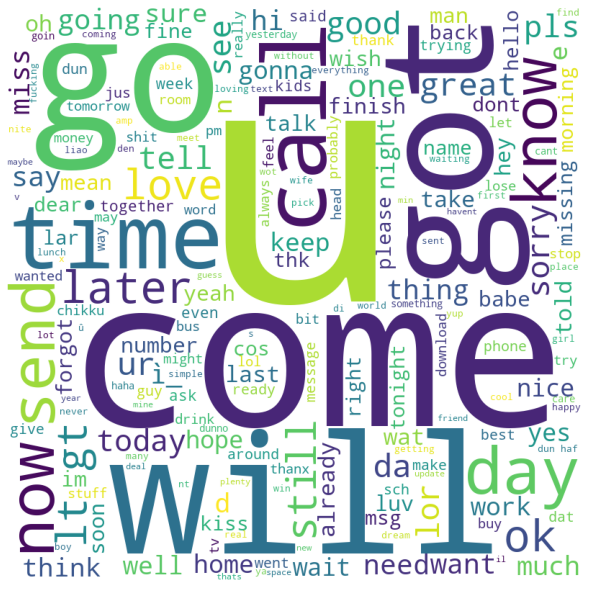

In [ ]:
create_word_cloud(spam_data_10_percent ,'ham')

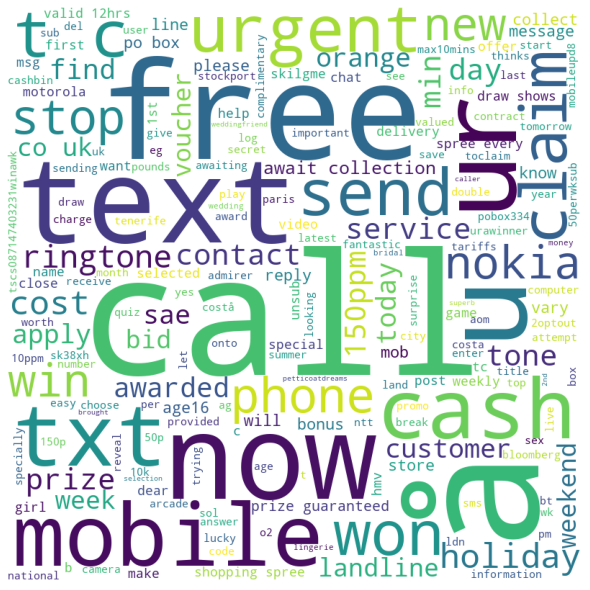

In [ ]:
create_word_cloud(spam_data_10_percent ,'spam')

# <font color = 'sky blue'> Pre-process data

In [ ]:
X_train_cleaned = SpacyPreprocessor(model='en_core_web_sm').transform(train_X.values)

## <font color ='sky blue'>**Pipeline 1: Data Preprocessing + Sparse Embeddings (TF-IDF) + ML Model**

# <font color = 'sky blue'> Create pipeline

In [ ]:
classifier = Pipeline([
    ('vectorizer', TfidfVectorizer(analyzer='word', token_pattern=r"[\S]+", ngram_range=(1,2))),
    ('classifier', XGBClassifier(njobs=-1)),])

# <font color ='sky blue'> GridSearchCV

In [ ]:
param_grid_classifier = {'vectorizer__max_features': [100, 500, 1000, 2000, 5000],
                            'classifier__n_estimators': [100, 300, 500, 750, 1000],
                         'classifier__learning_rate' : [0.01, 0.05, 0.1]
                           }

In [ ]:
grid_classifier = GridSearchCV(estimator=classifier, param_grid=param_grid_classifier, cv = 3)

# <font color = 'sky blue'> Train model

In [ ]:
grid_classifier.fit(X_train_cleaned, train_Y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('vectorizer',
                                        TfidfVectorizer(ngram_range=(1, 2),
                                                        token_pattern='[\\S]+')),
                                       ('classifier',
                                        XGBClassifier(njobs=-1))]),
             param_grid={'classifier__learning_rate': [0.01, 0.05, 0.1],
                         'classifier__n_estimators': [100, 300, 500, 750, 1000],
                         'vectorizer__max_features': [100, 500, 1000, 2000,
                                                      5000]})

In [ ]:
print(f'Best cross-validation score: {grid_classifier.best_score_:.2f}')
print("\nBest parameters: ", grid_classifier.best_params_)
print("\nBest estimator: ", grid_classifier.best_estimator_)

Best cross-validation score: 0.90

Best parameters:  {'classifier__learning_rate': 0.1, 'classifier__n_estimators': 750, 'vectorizer__max_features': 1000}

Best estimator:  Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_features=1000, ngram_range=(1, 2),
                                 token_pattern='[\\S]+')),
                ('classifier', XGBClassifier(n_estimators=750, njobs=-1))])


# <font color = 'sky blue'> Plot learning curve

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/dist-packages/matplotlib/pyplot.py'>

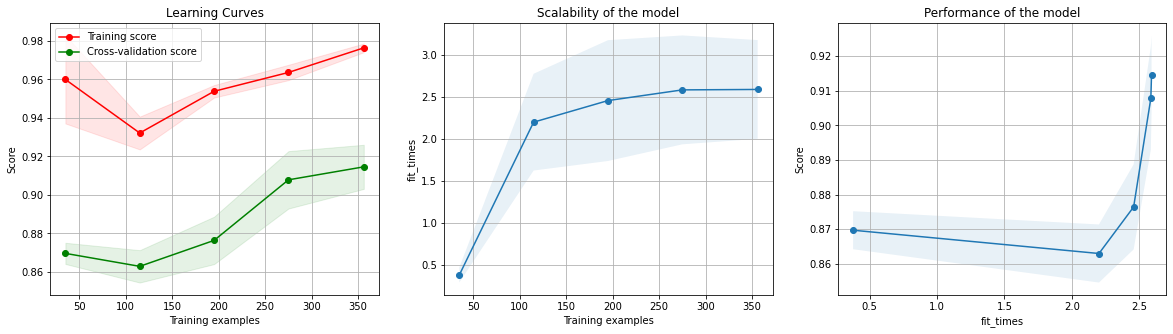

In [ ]:
# plot learning curces
plot_learning_curve(grid_classifier.best_estimator_, 'Learning Curves',
                    X_train_cleaned, train_Y, n_jobs=-1)

## there is overfitting. In case of overfitting we can improve results by 

1. Adding more data (training model on complete dataset)
2. By hyperparameter tuning (reduce model complexity) of model and vectorizer.


In [ ]:
# let's check the train scores
print(grid_classifier.best_estimator_.score(X_train_cleaned, train_Y))

# let's check the cross validation score
print(grid_classifier.best_score_)

0.9820224719101124
0.903410121530927


# <font color ='sky blue'> Evaluate test data

In [ ]:
# Final Pipeline
def final_pipeline(text):
    X_test_cleaned = SpacyPreprocessor(model='en_core_web_sm').transform(text)
    best_estimator = grid_classifier.best_estimator_
    predictions = best_estimator.predict(X_test_cleaned)
    return predictions

In [ ]:
# predicted values for Test data set
y_test_pred = final_pipeline(test_X.values)

# <font color ='sky blue'> Classification Report

In [ ]:
print('\nTest set classification report:\n\n', 
      classification_report(test_Y, y_test_pred))


Test set classification report:

               precision    recall  f1-score   support

         ham       0.92      0.98      0.95        99
        spam       0.71      0.38      0.50        13

    accuracy                           0.91       112
   macro avg       0.82      0.68      0.73       112
weighted avg       0.90      0.91      0.90       112



## <font color ='sky blue'>**Pipeline 2: Data Preprocessing + Manual Features + ML Model pipeline**

In [ ]:
featurizer =  ManualFeatures(spacy_model='en_core_web_sm')

In [ ]:
X_features, feature_names = featurizer.fit_transform(train_X.values)

In [ ]:
X_features.shape

(445, 11)

In [ ]:
feature_names

['count_words',
 'count_characters',
 'count_characters_no_space',
 'avg_word_length',
 'count_digits',
 'count_numbers',
 'noun_count',
 'aux_count',
 'verb_count',
 'adj_count',
 'ner']

### <font color ='sky blue'>**Create Pipeline**

In [ ]:
classifier_2 = Pipeline([
    ('classifier', XGBClassifier(njobs=-1)),
                        ])

# <font color ='sky blue'> Grid Search

In [ ]:
param_grid_classifier_2 = {'classifier__n_estimators': [100, 300, 500, 750, 1000],
                         'classifier__learning_rate' : [0.01, 0.05, 0.1]}

In [ ]:
grid_classifier_2 = GridSearchCV(estimator=classifier_2,
                                 param_grid=param_grid_classifier_2,
                                 cv=3)

# <font color ='sky blue'> Training model

In [ ]:
# Fit the model on training data
grid_classifier_2.fit(X_features, train_Y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('classifier',
                                        XGBClassifier(njobs=-1))]),
             param_grid={'classifier__learning_rate': [0.01, 0.05, 0.1],
                         'classifier__n_estimators': [100, 300, 500, 750,
                                                      1000]})

In [ ]:
print(f'Best cross-validation score: {grid_classifier_2.best_score_:.2f}')
print("\nBest parameters: ", grid_classifier_2.best_params_)
print("\nBest estimator: ", grid_classifier_2.best_estimator_)

Best cross-validation score: 0.97

Best parameters:  {'classifier__learning_rate': 0.01, 'classifier__n_estimators': 100}

Best estimator:  Pipeline(steps=[('classifier', XGBClassifier(learning_rate=0.01, njobs=-1))])


# <font color = 'sky blue'> Plot learning curve

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/dist-packages/matplotlib/pyplot.py'>

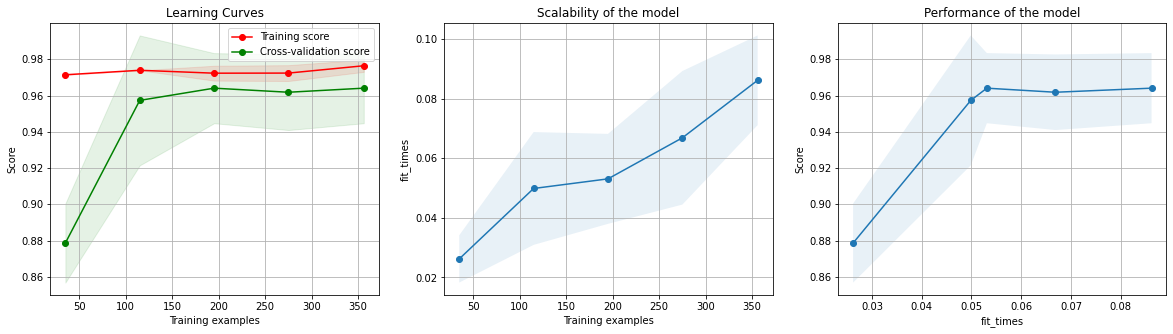

In [ ]:
# plot learning curces
plot_learning_curve(grid_classifier_2.best_estimator_, 'Learning Curves',
                    X_features, train_Y, n_jobs=-1)

## Model is not good as it is not overfitting with even sample data.

In [ ]:
# let's check the train scores
print(grid_classifier_2.best_estimator_.score(X_features, train_Y))

# let's check the cross validation score
print(grid_classifier_2.best_score_)

0.9797752808988764
0.9685742789769636


# <font color ='sky blue'> Evaluate test data

In [ ]:
# Final Pipeline
def final_pipeline(text):
    X_test_cleaned, feature_names = featurizer.fit_transform(text)
    best_estimator = grid_classifier_2.best_estimator_
    predictions = best_estimator.predict(X_test_cleaned)
    return predictions

In [ ]:
# predicted values for Test data set
y_test_pred = final_pipeline(test_X.values)

### <font color ='sky blue'>**Classification report for test dataset**

In [ ]:
print('\nTest set classification report:\n\n', 
      classification_report(test_Y, y_test_pred))


Test set classification report:

               precision    recall  f1-score   support

         ham       1.00      0.98      0.99        99
        spam       0.87      1.00      0.93        13

    accuracy                           0.98       112
   macro avg       0.93      0.99      0.96       112
weighted avg       0.98      0.98      0.98       112



## <font color ='sky blue'>**Pipeline 3: Combine Manual Features and TfIDF vectors**

In [ ]:
X_train_final = pd.concat((pd.DataFrame(X_train_cleaned, columns=['cleaned_text']),
                           pd.DataFrame(X_features, columns=feature_names)), axis =1)

In [ ]:
X_train_final.head()

,cleaned_text,count_words,count_characters,count_characters_no_space,avg_word_length,count_digits,count_numbers,noun_count,aux_count,verb_count,adj_count,ner
0,yes princess want catch big strong hand,12.0,57.0,46.0,3.538462,0.0,0.0,0.0,1.0,0.0,2.0,2.0
1,kallis ready bat 2nd innings,8.0,38.0,31.0,3.444444,1.0,1.0,2.0,3.0,1.0,0.0,2.0
2,come u get,7.0,28.0,22.0,2.750000,0.0,0.0,0.0,1.0,0.0,3.0,0.0
3,customer service announcement recently try del...,24.0,137.0,114.0,4.560000,18.0,2.0,1.0,6.0,1.0,6.0,1.0
4,usual u ard 10 smth,8.0,31.0,24.0,2.666667,2.0,1.0,1.0,1.0,1.0,1.0,2.0


In [ ]:
X_train_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445 entries, 0 to 444
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   cleaned_text               445 non-null    object 
 1   count_words                445 non-null    float64
 2   count_characters           445 non-null    float64
 3   count_characters_no_space  445 non-null    float64
 4   avg_word_length            445 non-null    float64
 5   count_digits               445 non-null    float64
 6   count_numbers              445 non-null    float64
 7   noun_count                 445 non-null    float64
 8   aux_count                  445 non-null    float64
 9   verb_count                 445 non-null    float64
 10  adj_count                  445 non-null    float64
 11  ner                        445 non-null    float64
dtypes: float64(11), object(1)
memory usage: 41.8+ KB


In [ ]:
class SparseTransformer(TransformerMixin, BaseEstimator):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return csr_matrix(X)

In [ ]:
sparse_features = Pipeline([('sparse', SparseTransformer()), ])
vectorizer = Pipeline([('tfidf', TfidfVectorizer(analyzer='word', token_pattern=r"[\S]+", ngram_range=(1,2))), ])

In [ ]:
combined_features = ColumnTransformer(
 transformers=[
     ('tfidf', vectorizer, 'cleaned_text'),
      ], remainder=sparse_features
     )

In [ ]:
classifier_3 = Pipeline([('combined_features',  combined_features),
                         ('classifier', XGBClassifier(njobs=-1)),
                        ])

In [ ]:
# We are exploring a small combination of parameters

param_grid_classifier_3 = {'combined_features__tfidf__tfidf__max_features': [500, 1000, 2000], 
                           'classifier__n_estimators': [100, 300, 500, 750, 1000],
                         'classifier__learning_rate' : [0.01, 0.05, 0.1]
                          }

In [ ]:
# We will now use Gridserach to find fine tune hyperparameters using cross validation

grid_classifier_3 = GridSearchCV(estimator=classifier_3, 
                                 param_grid=param_grid_classifier_3,
                                 cv=3)

In [ ]:
# Fit the model on training data
grid_classifier_3.fit(X_train_final, train_Y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('combined_features',
                                        ColumnTransformer(remainder=Pipeline(steps=[('sparse',
                                                                                     SparseTransformer())]),
                                                          transformers=[('tfidf',
                                                                         Pipeline(steps=[('tfidf',
                                                                                          TfidfVectorizer(ngram_range=(1,
                                                                                                                       2),
                                                                                                          token_pattern='[\\S]+'))]),
                                                                         'cleaned_text')])),
                                       ('classifier',
         

# <font color='sky blue'> Best parameters

In [ ]:
print("Best cross-validation score: {:.2f}".format(grid_classifier_3.best_score_))
print("\nBest parameters: ", grid_classifier_3.best_params_)
print("\nBest estimator: ", grid_classifier_3.best_estimator_)

Best cross-validation score: 0.97

Best parameters:  {'classifier__learning_rate': 0.05, 'classifier__n_estimators': 750, 'combined_features__tfidf__tfidf__max_features': 500}

Best estimator:  Pipeline(steps=[('combined_features',
                 ColumnTransformer(remainder=Pipeline(steps=[('sparse',
                                                              SparseTransformer())]),
                                   transformers=[('tfidf',
                                                  Pipeline(steps=[('tfidf',
                                                                   TfidfVectorizer(max_features=500,
                                                                                   ngram_range=(1,
                                                                                                2),
                                                                                   token_pattern='[\\S]+'))]),
                                                  'cleaned_text'

### <font color ='sky blue'>**Plot Learning Curve**

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/dist-packages/matplotlib/pyplot.py'>

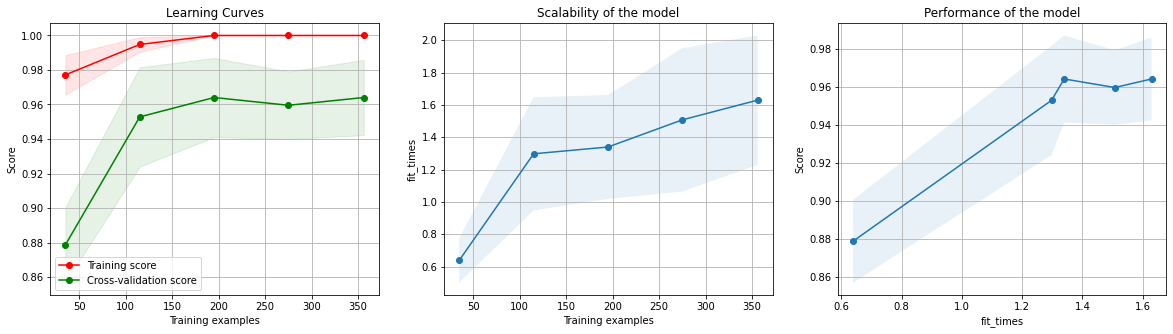

In [ ]:
# plot learning curces
plot_learning_curve(grid_classifier_3.best_estimator_, 'Learning Curves',
                    X_train_final, train_Y, n_jobs=-1)

## Model is overfitting, We can improve it adding more data or reducing complexity.

In [ ]:
# let's check the train scores
print(grid_classifier_3.best_estimator_.score(X_train_final, train_Y))

# let's check the cross validation score
print(grid_classifier_3.best_score_)

1.0
0.9685591631900357


### <font color ='sky blue'>**Evaluate model on test datset**

In [ ]:
# Final Pipeline
def final_pipeline(text):
    X_test_cleaned = SpacyPreprocessor(model='en_core_web_sm').transform(text)
    X_features, feature_names = featurizer.fit_transform(text)
    X_final = pd.concat((pd.DataFrame(X_test_cleaned, columns=['cleaned_text']),
                         pd.DataFrame(X_features, columns=feature_names)), axis=1)
    predictions = grid_classifier_3.best_estimator_.predict(X_final)
    return predictions

In [ ]:
# predicted values for Test data set
y_test_pred = final_pipeline(test_X.values)

### <font color ='sky blue'>**Classification report for test dataset**

In [ ]:
print('\nTest set classification report:\n\n', classification_report(test_Y, y_test_pred ))


Test set classification report:

               precision    recall  f1-score   support

         ham       1.00      0.97      0.98        99
        spam       0.81      1.00      0.90        13

    accuracy                           0.97       112
   macro avg       0.91      0.98      0.94       112
weighted avg       0.98      0.97      0.97       112



# <font color='sky blue'> Overall Pipeline3 seems to be a good choice to improve further by using more data

# **Required Submissions:**
1.  Submit two colab/jupyter notebooks
- (analysis with smaller subset and all three pipelines)
- (analysis with bigger subset and only final pipeline)
2. Pdf version of the notebooks (HWs will not be graded if pdf version is not provided.
3. **The notebooks and pdf files should have the output.**
4. **Name files as follows : FirstName_file1_hw2, FirstName_file2_h2**